In [99]:
import pandas as pd

In [100]:
import matplotlib.pyplot as plt

In [101]:
import seaborn as sns

In [102]:
from scipy.stats import norm


In [103]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [104]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [105]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [106]:
#Total Records in the Dataset

df.shape[0]

5110

In [107]:
#Total Count of Null values in the Dataset

df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [108]:
# mean of all the columns in the dataset

df[['id','age','hypertension','heart_disease','avg_glucose_level','bmi','stroke']].mean()

id                   36517.829354
age                     43.226614
hypertension             0.097456
heart_disease            0.054012
avg_glucose_level      106.147677
bmi                     28.893237
stroke                   0.048728
dtype: float64

In [109]:
# median of all the columns in the dataset

df[['id','age','hypertension','heart_disease','avg_glucose_level','bmi','stroke']].median()

id                   36932.000
age                     45.000
hypertension             0.000
heart_disease            0.000
avg_glucose_level       91.885
bmi                     28.100
stroke                   0.000
dtype: float64

In [110]:
# std of all the columns in the dataset

df[['id','age','hypertension','heart_disease','avg_glucose_level','bmi','stroke']].std()

id                   21161.721625
age                     22.612647
hypertension             0.296607
heart_disease            0.226063
avg_glucose_level       45.283560
bmi                      7.854067
stroke                   0.215320
dtype: float64

In [111]:
#Overall Statistics of each numerical column in the dataset

df.describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# 1. Plot Charts

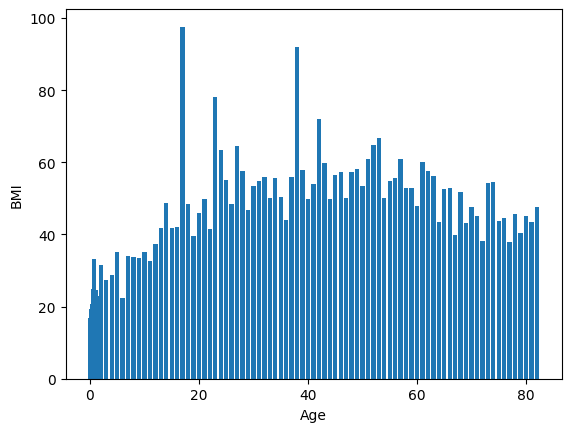

In [112]:
#Plotting a BarPlot of Age vs BMI

X = df.iloc[:,2]
Y = df.iloc[:,9]

plt.xlabel("Age")
plt.ylabel("BMI")

plt.bar(X,Y)
plt.show()

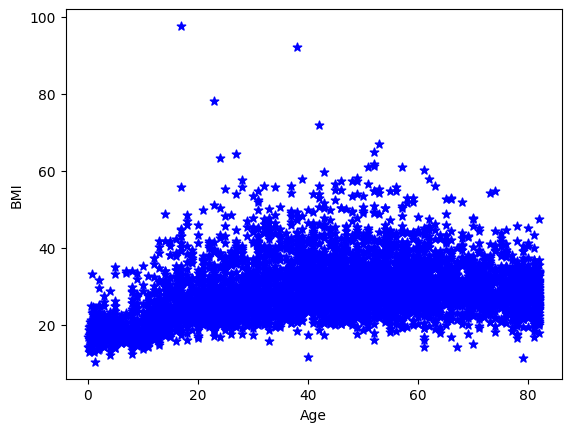

In [113]:
#Plotting a ScatterPlot of Age vs BMI

X = df.iloc[:,2]
Y = df.iloc[:,9]

plt.xlabel("Age")
plt.ylabel("BMI")

plt.scatter(X , Y, label= "stars", color= "blue", 
            marker= "*", s=40)

In [114]:
# The provided code is creating a scatter plot to visualize the relationship between "Age" and "BMI" data points. 
# It uses the `matplotlib` library to plot the data, where the "Age" values are represented on the x-axis and the corresponding "BMI" 
# values are represented on the y-axis. The scatter plot uses green stars as markers for each data point, and the size of each star is set to 40.
# This plot allows for a visual examination of any potential patterns or correlations between "Age" and "BMI" in the dataset.

<Axes: xlabel='stroke', ylabel='age'>

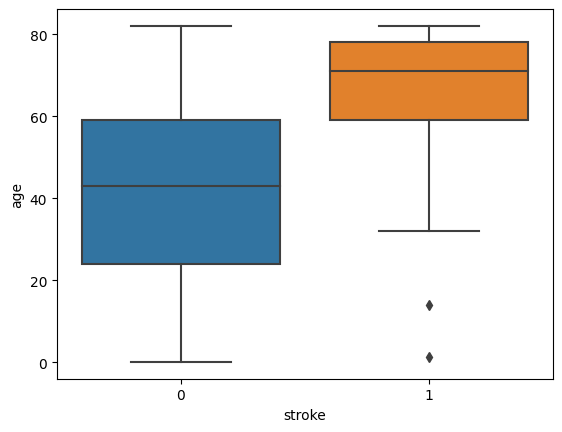

In [115]:
#Through this plot we can understand that the age group between 60-80 have a stroke whereas the age group between 20-60 
#have no stroke according to the data

sns.boxplot(data=df,x='stroke',y='age')

# 2. Checking Null Values and Percentage and filling Null values

In [116]:
#Calculating count of null values in BMI Column

count_of_na = df['bmi'].isna().sum()
count_of_na

201

In [117]:
#Calculating percentage of null values in BMI Column

percentage = (count_of_na / df.shape[0]) * 100
print(percentage)

3.9334637964774952


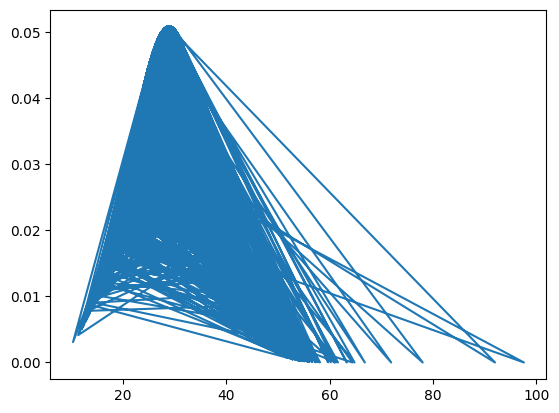

In [118]:
#Checking the distribution of BMI

plt.plot(Y, norm.pdf(Y, df['bmi'].mean(), df['bmi'].std()))
plt.show()

In [119]:
#Filling the missing values with Median because the distribution is Skew

median_value = df['bmi'].median()
df['bmi'].fillna(value=median_value, inplace=True)

# 3. Removing Outliers

In [120]:
#Since the data is skewed, instead of using a z-score I have used interquartile range to determine and remove the outliers

#Function for calculating the Lower and Upper bound using IQR rule

def calculatingBounds(col):
    sorted(col)
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return lower_bound,upper_bound


In [121]:
#Removing Outliers of BMI Column

lower_bound,upper_bound = calculatingBounds(df['bmi'])

df.drop(df[(df['bmi'] < lower_bound) | (df['bmi'] > upper_bound)].index , inplace=True)


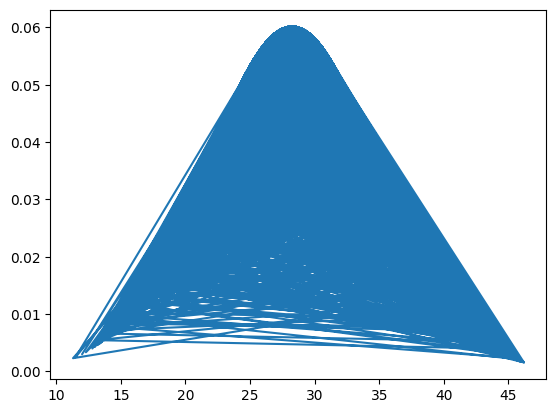

In [122]:
#Checking Distribution of BMI after removing outliers

plt.plot(df['bmi'], norm.pdf(df['bmi'], df['bmi'].mean(), df['bmi'].std()))
plt.show()

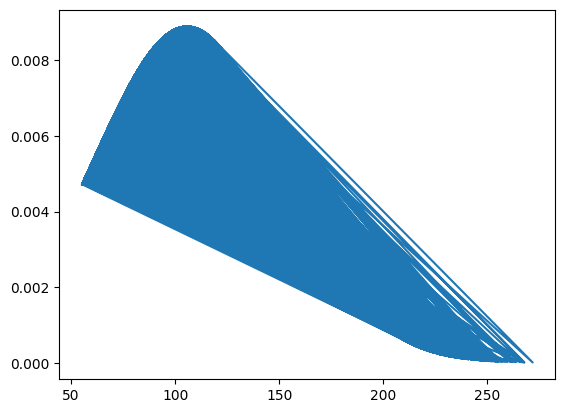

In [123]:
#Checking Distribution of Average Glucose Level before removing outliers

plt.plot(df['avg_glucose_level'], norm.pdf(df['avg_glucose_level'], df['avg_glucose_level'].mean(), df['avg_glucose_level'].std()))
plt.show()

In [124]:
#Removing Outliers of Average Glucose Level Column

lower_bound,upper_bound = calculatingBounds(df['avg_glucose_level'])

df.drop(df[(df['avg_glucose_level'] < lower_bound) | (df['avg_glucose_level'] > upper_bound)].index , inplace=True)

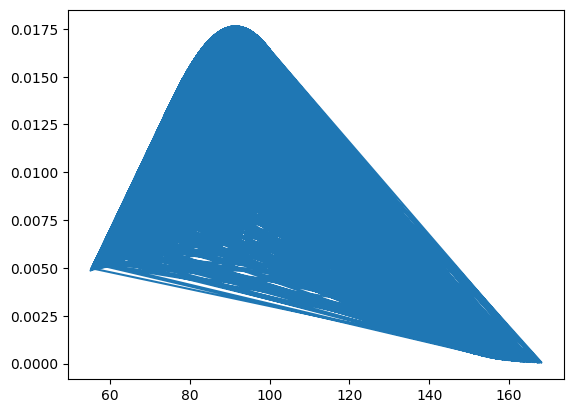

In [125]:
#Checking Distribution of Average Glucose Level after removing outliers

plt.plot(df['avg_glucose_level'], norm.pdf(df['avg_glucose_level'], df['avg_glucose_level'].mean(), df['avg_glucose_level'].std()))
plt.show()

# 4. Scaling on Numerical Columns

In [126]:
#Scaling all Numerical Columns using Standard Scaler because the data is somewhat normally distributed

scaler = StandardScaler()
X = df[['id','hypertension','heart_disease','avg_glucose_level', 'bmi', 'age', 'stroke']]
df[['id','hypertension','heart_disease','avg_glucose_level', 'bmi', 'age', 'stroke']] = scaler.fit_transform(X)

# 5. Encoding on Categorical Columns

In [127]:
#Performed Label Encoding on all Categorical Columns

encoder = LabelEncoder()
df = df.apply(encoder.fit_transform)

In [128]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,1841,1,101,0,1,1,2,0,2444,197,2,1
6,3221,1,95,1,1,1,2,0,579,146,2,1
7,638,0,90,0,0,0,2,1,1919,100,2,1
8,1618,0,80,0,0,1,2,0,898,153,0,1
9,3640,0,99,0,0,1,2,1,123,114,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1122,0,101,1,0,1,2,1,1338,153,2,0
5106,2655,0,102,0,0,1,3,1,2982,272,2,0
5107,1193,0,56,0,0,1,3,0,1294,178,2,0
5108,2226,1,72,0,0,1,2,0,3309,128,1,0


In [129]:
df.to_csv("Resultant_CSV.csv", index=False)

# 6. 2 new features using existing features 

In [130]:
# Generate the 'health_index' feature
df['health_index'] = df['age'] / (df['bmi'] + 1)
df


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,health_index
2,1841,1,101,0,1,1,2,0,2444,197,2,1,0.510101
6,3221,1,95,1,1,1,2,0,579,146,2,1,0.646259
7,638,0,90,0,0,0,2,1,1919,100,2,1,0.891089
8,1618,0,80,0,0,1,2,0,898,153,0,1,0.519481
9,3640,0,99,0,0,1,2,1,123,114,0,1,0.860870
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1122,0,101,1,0,1,2,1,1338,153,2,0,0.655844
5106,2655,0,102,0,0,1,3,1,2982,272,2,0,0.373626
5107,1193,0,56,0,0,1,3,0,1294,178,2,0,0.312849
5108,2226,1,72,0,0,1,2,0,3309,128,1,0,0.558140


In [131]:
# Feature: Risk Group ('risk_group')
# Categorizing individuals into different risk groups based on their age and stroke history

def get_risk_group(row):
    if row['stroke'] == 1:
        return 'High Risk - Stroke'
    else:
        if row['age'] >= 60:
            return 'High Risk - Age'
        elif 40 <= row['age'] < 60:
            return 'Medium Risk - Age'
        else:
            return 'Low Risk - Age'

df['risk_group'] = df.apply(get_risk_group, axis=1)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,health_index,risk_group
2,1841,1,101,0,1,1,2,0,2444,197,2,1,0.510101,High Risk - Stroke
6,3221,1,95,1,1,1,2,0,579,146,2,1,0.646259,High Risk - Stroke
7,638,0,90,0,0,0,2,1,1919,100,2,1,0.891089,High Risk - Stroke
8,1618,0,80,0,0,1,2,0,898,153,0,1,0.519481,High Risk - Stroke
9,3640,0,99,0,0,1,2,1,123,114,0,1,0.860870,High Risk - Stroke
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1122,0,101,1,0,1,2,1,1338,153,2,0,0.655844,High Risk - Age
5106,2655,0,102,0,0,1,3,1,2982,272,2,0,0.373626,High Risk - Age
5107,1193,0,56,0,0,1,3,0,1294,178,2,0,0.312849,Medium Risk - Age
5108,2226,1,72,0,0,1,2,0,3309,128,1,0,0.558140,High Risk - Age


In [132]:
# Feature: Health Status ('health_status')
# The health status based on the combination of 'work_type' and 'hypertension'

def get_health_status(row):
    if row['hypertension'] == 1:
        return 'Hypertension +'
    else:
        if row['work_type'] == 1:
            return 'Healthy - Work Type 1'
        elif row['work_type'] == 2:
            return 'Healthy - Work Type 2'
        elif row['work_type'] == 3:
            return 'Healthy - Work Type 3'
        elif row['work_type'] == 4:
            return 'Healthy - Work Type 4'
        else:
            return 'Unknown'

df['health_status'] = df.apply(get_health_status, axis=1)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,health_index,risk_group,health_status
2,1841,1,101,0,1,1,2,0,2444,197,2,1,0.510101,High Risk - Stroke,Healthy - Work Type 2
6,3221,1,95,1,1,1,2,0,579,146,2,1,0.646259,High Risk - Stroke,Hypertension +
7,638,0,90,0,0,0,2,1,1919,100,2,1,0.891089,High Risk - Stroke,Healthy - Work Type 2
8,1618,0,80,0,0,1,2,0,898,153,0,1,0.519481,High Risk - Stroke,Healthy - Work Type 2
9,3640,0,99,0,0,1,2,1,123,114,0,1,0.860870,High Risk - Stroke,Healthy - Work Type 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1122,0,101,1,0,1,2,1,1338,153,2,0,0.655844,High Risk - Age,Hypertension +
5106,2655,0,102,0,0,1,3,1,2982,272,2,0,0.373626,High Risk - Age,Healthy - Work Type 3
5107,1193,0,56,0,0,1,3,0,1294,178,2,0,0.312849,Medium Risk - Age,Healthy - Work Type 3
5108,2226,1,72,0,0,1,2,0,3309,128,1,0,0.558140,High Risk - Age,Healthy - Work Type 2
